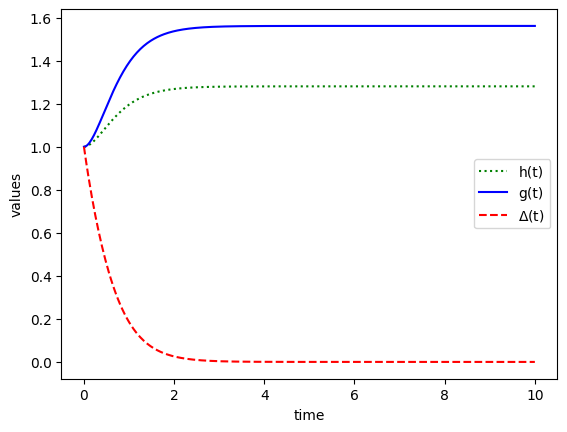

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(u,t):
    x = u[0]
    y = u[1]
    z = u[2]
    g = 1
    k = 0.5
    eps = 1
    dxdt = 2*g*k*(eps-z)*z
    dydt = 2*g*(eps-z)*z
    dzdt = -(x+y*k)*z
    dudt = [dxdt,dydt,dzdt]
    return dudt

# initial condition
u0 = [1,1,1]

# number of time points
n = 401

# time points
t = np.linspace(0,10,n)

# store solution
x = np.empty_like(t)
y = np.empty_like(t)
z = np.empty_like(t)

# record initial conditions
x[0] = u0[0]
y[0] = u0[1]
z[0] = u0[2]
# solve ODE
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    u = odeint(model,u0,tspan)
    # store solution for plotting
    x[i] = u[1][0]
    y[i] = u[1][1]
    z[i] = u[1][2]
    # next initial condition
    u0 = u[1]

# plot results
plt.plot(t,x,'g:',label='h(t)')
plt.plot(t,y,'b-',label='g(t)')
plt.plot(t,z,'r--',label='$\Delta$(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

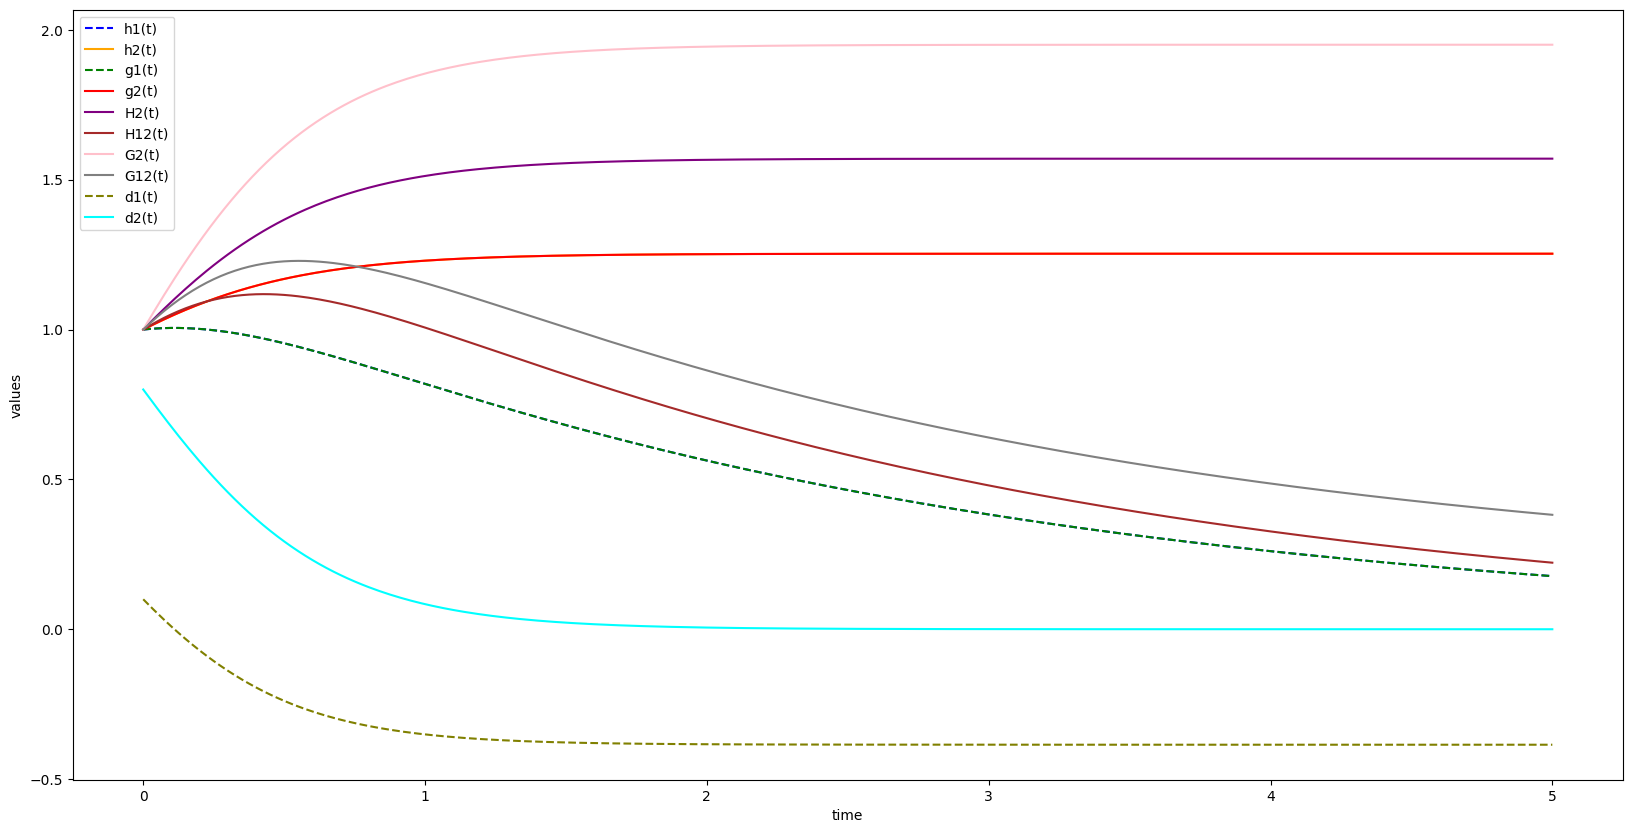

-0.3853232911788165

In [4]:
# function that returns dz/dt
def model(u,t):
    h1, h2,g1,g2, H2, H12, G2, G12, d1, d2 = u[0],u[1],u[2],u[3],u[4],u[5],u[6],u[7],u[8],u[9]
    k1 = 1
    k2 = 0.6
    k12 = 0.2
    dg1dt = d1*k1*h1
    dg2dt = d2*k2*h2
    dh1dt = d1*k1*g1
    dh2dt = d2*k2*g2
    dH2dt = 2*k2*g2*h2*d2
    dH12dt = d1*k1*g1*h2 + d2*k2*h1*g2
    dG2dt = 2*g2*h2*d2
    dG12dt = d1*h1*g2 + d2*g1*h2
    d1dt = -(H12 + G12*k12)*d2
    d2dt = -(H2 + G2*k2)*d2

    dudt = [dh1dt, dh2dt,  dg1dt,  dg2dt,dH2dt, dH12dt, dG2dt , dG12dt, d1dt, d2dt]

    return dudt

# initial condition
u0 = [1,1,1,1,1,1,1,1,0.1,0.8]

# number of time points
n = 401

# time points
t = np.linspace(0,5,n)

# store solution
a = np.empty_like(t)
b = np.empty_like(t)
c = np.empty_like(t)
d = np.empty_like(t)
e = np.empty_like(t)
f = np.empty_like(t)
g = np.empty_like(t)
h = np.empty_like(t)
i = np.empty_like(t)
j = np.empty_like(t)

# record initial conditions
a[0] = u0[0]
b[0] = u0[1]
c[0] = u0[2]
d[0] = u0[3]
e[0] = u0[4]
f[0] = u0[5]
g[0] = u0[6]
h[0] = u0[7]
i[0] = u0[8]
j[0] = u0[9]

# solve ODE
for iter in range(1,n):
    # span for next time step
    tspan = [t[iter-1],t[iter]]
    # solve for next step
    u = odeint(model,u0,tspan)
    # store solution for plotting
    a[iter] = u[1][0]
    b[iter] = u[1][1]
    c[iter] = u[1][2]
    d[iter] = u[1][3]
    e[iter] = u[1][4]
    f[iter] = u[1][5]
    g[iter] = u[1][6]
    h[iter] = u[1][7]
    i[iter] = u[1][8]
    j[iter] = u[1][9]
    # next initial condition
    u0 = u[1]

# plot results : h1, h2,g1,g2, H2, H12, G2, G12, d1, d2
fig = plt.figure(figsize=(20,10))
plt.plot(t,a,'blue', linestyle='--',label='h1(t)')
plt.plot(t,b,'orange',label='h2(t)')
plt.plot(t,c,'green',linestyle='--',label='g1(t)')
plt.plot(t,d,'red',label='g2(t)')
plt.plot(t,e,'purple',label='H2(t)')
plt.plot(t,f,'brown',label='H12(t)')
plt.plot(t,g,'pink',label='G2(t)')
plt.plot(t,h,'gray',label='G12(t)')
plt.plot(t,i,'olive', linestyle='--',label='d1(t)')
plt.plot(t,j,'cyan',label='d2(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()
